In [69]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [70]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,

)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [71]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary


In [72]:
zero_policy = {"DaysToThreat": 0}
zero_policy.update({f"DikeIncrease {n}": 0 for n in planning_steps})
zero_policy.update({f"RfR {n}": 0 for n in planning_steps})

In [73]:
zero_policy

{'DaysToThreat': 0,
 'DikeIncrease 0': 0,
 'DikeIncrease 1': 0,
 'DikeIncrease 2': 0,
 'RfR 0': 0,
 'RfR 1': 0,
 'RfR 2': 0}

In [74]:
dike_model.levers[0]

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)

In [75]:
pol0 = {}

for key in dike_model.levers:
    s1, s2 = key.name.split("_")
    pol0.update({key.name: zero_policy[s2]})

policy0 = Policy("Policy 0", **pol0)

In [76]:
# for key in dike_model.levers:
#     s1, s2 = key.name.split("_")
#     print(key)
#     
    # pol0.update({key.name: zero_policy[s2]})

In [77]:
# for outcome in dike_model.outcomes:
#     print(repr(outcome))

In [78]:
from ema_workbench import perform_experiments
from ema_workbench import Samplers
from ema_workbench import SequentialEvaluator


In [79]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=40,policies=policy0,uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 12 workers
C:\Users\roelo\anaconda3\envs\MD\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 1600 scenarios * 1 policies * 1 model(s) = 1600 experiments
100%|██████████████████████████████████████| 1600/1600 [02:58<00:00,  8.96it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [80]:
experiments, outcomes = results

In [81]:
for unc in dike_model.uncertainties:
    print((unc))

discount rate 0
discount rate 1
discount rate 2
A.0_ID flood wave shape
A.1_Bmax
A.1_pfail
A.1_Brate
A.2_Bmax
A.2_pfail
A.2_Brate
A.3_Bmax
A.3_pfail
A.3_Brate
A.4_Bmax
A.4_pfail
A.4_Brate
A.5_Bmax
A.5_pfail
A.5_Brate


In [82]:
list(dike_model.uncertainties)

[CategoricalParameter('discount rate 0', [0, 1, 2, 3]),
 CategoricalParameter('discount rate 1', [0, 1, 2, 3]),
 CategoricalParameter('discount rate 2', [0, 1, 2, 3]),
 IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False),
 RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False),
 RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False),
 CategoricalParameter('A.1_Brate', [0, 1, 2]),
 RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False),
 RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False),
 CategoricalParameter('A.2_Brate', [0, 1, 2]),
 RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False),
 RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, v

In [83]:
help(type(dike_model.uncertainties[0]))

Help on class CategoricalParameter in module ema_workbench.em_framework.parameters:

class CategoricalParameter(IntegerParameter)
 |  CategoricalParameter(name, categories, default=None, variable_name=None, pff=False, multivalue=False)
 |  
 |  categorical model input parameter
 |  
 |  Parameters
 |  ----------
 |  name : str
 |  categories : collection of obj
 |  variable_name : str, or list of str
 |  multivalue : boolean
 |               if categories have a set of values, for each variable_name
 |               a different one.
 |  # TODO: should multivalue not be a separate class?
 |  # TODO: multivalue as label is also horrible
 |  
 |  Method resolution order:
 |      CategoricalParameter
 |      IntegerParameter
 |      Parameter
 |      ema_workbench.em_framework.util.Variable
 |      ema_workbench.em_framework.util.NamedObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, categories, default=None, variable_name=None, pff=False, multival

In [84]:
[x.name for x in dike_model.uncertainties]

['discount rate 0',
 'discount rate 1',
 'discount rate 2',
 'A.0_ID flood wave shape',
 'A.1_Bmax',
 'A.1_pfail',
 'A.1_Brate',
 'A.2_Bmax',
 'A.2_pfail',
 'A.2_Brate',
 'A.3_Bmax',
 'A.3_pfail',
 'A.3_Brate',
 'A.4_Bmax',
 'A.4_pfail',
 'A.4_Brate',
 'A.5_Bmax',
 'A.5_pfail',
 'A.5_Brate']

In [85]:
experiments.columns.isin([x.name for x in dike_model.uncertainties])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [86]:
experiments_unc =experiments.iloc[:,0:19]

In [87]:
experiments_unc

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,0,347.518165,10.0,0.777226,63.251723,10.0,0.454063,112.946431,1.0,0.086264,282.164446,1.5,0.966859,245.047796,1.5,0.396398,4.5,4.5,3.5
1,122,347.518165,10.0,0.777226,63.251723,10.0,0.454063,112.946431,1.0,0.086264,282.164446,1.5,0.966859,245.047796,1.5,0.396398,4.5,4.5,3.5
2,0,240.396035,10.0,0.777226,63.251723,10.0,0.454063,112.946431,1.0,0.086264,282.164446,1.5,0.966859,245.047796,1.5,0.396398,4.5,4.5,3.5
3,0,347.518165,1.0,0.777226,63.251723,10.0,0.454063,112.946431,1.0,0.086264,282.164446,1.5,0.966859,245.047796,1.5,0.396398,4.5,4.5,3.5
4,0,347.518165,10.0,0.543757,63.251723,10.0,0.454063,112.946431,1.0,0.086264,282.164446,1.5,0.966859,245.047796,1.5,0.396398,4.5,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,69,92.259229,10.0,0.062457,311.006660,10.0,0.625857,215.028580,10.0,0.947638,171.231545,10.0,0.480731,189.124440,1.5,0.274098,3.5,2.5,2.5
1596,69,92.259229,10.0,0.062457,311.006660,10.0,0.625857,215.028580,10.0,0.947638,171.231545,10.0,0.480731,189.124440,1.5,0.890446,4.5,2.5,2.5
1597,69,92.259229,10.0,0.062457,311.006660,10.0,0.625857,215.028580,10.0,0.947638,171.231545,10.0,0.480731,189.124440,1.5,0.890446,3.5,4.5,2.5
1598,69,92.259229,10.0,0.062457,311.006660,10.0,0.625857,215.028580,10.0,0.947638,171.231545,10.0,0.480731,189.124440,1.5,0.890446,3.5,2.5,2.5


In [88]:
# experiments_uncertainties = experiments[experiments.columns is experiments.columns.isin([x.name for x in dike_model.uncertainties]) ]

C:\Users\roelo\anaconda3\envs\MD\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


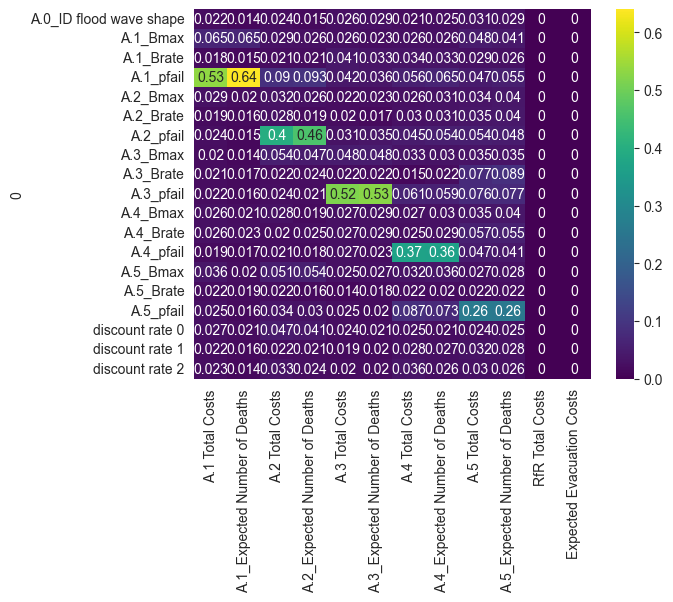

In [89]:
from ema_workbench.analysis import feature_scoring

x = experiments_unc
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [90]:
outcomes["A.5_Expected Number of Deaths"]

array([0., 0., 0., ..., 0., 0., 0.])

In [91]:
outcomes.keys()


dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [92]:
import pandas as pd

In [93]:
df =pd.DataFrame(outcomes)

In [94]:
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [95]:
problem = get_SALib_problem(dike_model.uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


                               ST   ST_conf
A.0_ID flood wave shape  0.105893  0.151429
A.1_Bmax                 0.054399  0.089010
A.1_Brate                0.000430  0.000948
A.1_pfail                0.269132  0.359727
A.2_Bmax                 0.000124  0.000204
A.2_Brate                0.000835  0.001367
A.2_pfail                0.344241  0.405939
A.3_Bmax                 0.079193  0.150685
A.3_Brate                0.001757  0.002533
A.3_pfail                0.630207  0.561944
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                0.028870  0.059209
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                1.697398  2.595098
discount rate 0          0.013587  0.014008
discount rate 1          0.003201  0.003208
discount rate 2          0.010093  0.011701
                               S1   S1_conf
A.0_ID flood wave shape -0.025093  0.054562
A.1_Bmax                 0.03403

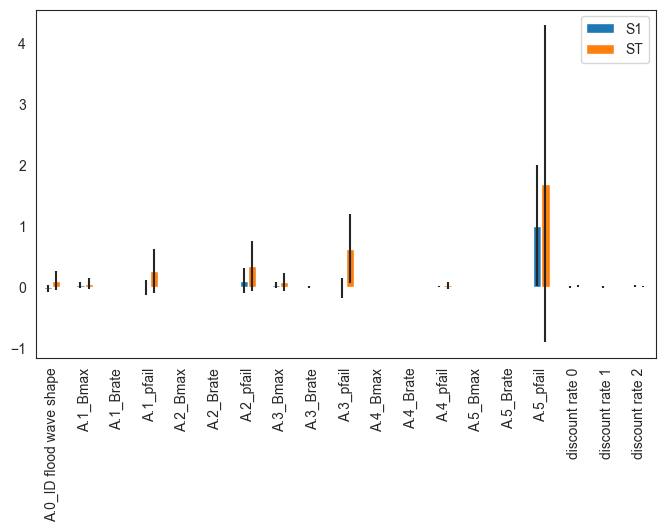

In [99]:
Si = sobol.analyze(problem, outcomes["A.5 Total Costs"], calc_second_order=True, print_to_console=True)
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

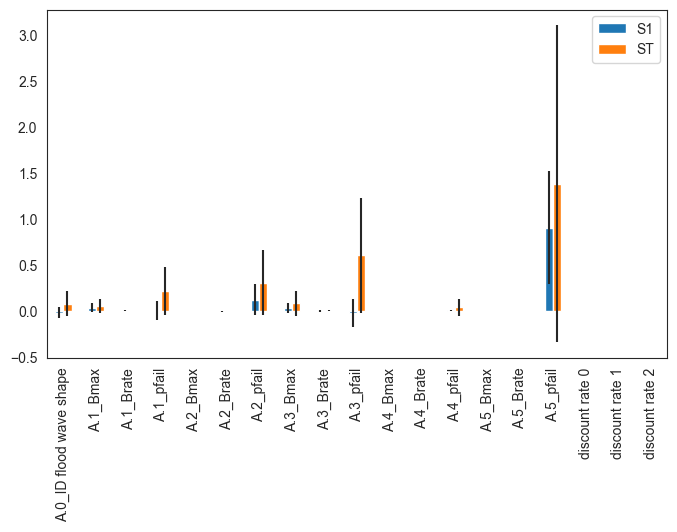

In [97]:
Si = sobol.analyze(problem, outcomes["A.5_Expected Number of Deaths"], calc_second_order=True, print_to_console=True)
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [98]:
from SALib.analyze import sobol